# Generating gene content pictures from  of the results of the NNI+DeCoSTAR experiments of July and August 2018
Cedric Chauve, October 16, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LAMBDA = ['lambda_025','lambda_05','lambda_1','lambda_2','lambda_3','lambda_5','lambda_7','lambda_10','lambda_20','lambda_30','lambda_50']

In [3]:
def get_ancestral_species(F,virtual_root):
    data = open(F,'r').readlines()
    ancestral_species = []
    for gene in data:
        gene1     = gene.rstrip().split()
        species   = gene1[0]
        gene_name = gene1[1]
        if '|' in gene_name and not species in ancestral_species:
            ancestral_species.append(species)
    if virtual_root in ancestral_species:
        ancestral_species.remove(virtual_root)
    return(ancestral_species)

In [4]:
ANCSPECIES_DL  = get_ancestral_species('../../decostar_instances/results/notransfers_true_trees.genes.txt','NA')
ANCSPECIES_DTL = get_ancestral_species('../../decostar_instances/results/transfers_true_trees.genes.txt','52')

In [5]:
TRUE = 'true trees' # Label of the tick corresponding to true trees in figures
TLAMBDA = [TRUE]+LAMBDA

In [6]:
def count_gene_content(prefix,true_trees,ancestral_species):
    # Gene content of the perturbed tree
    gene_content = {l: {species: 0 for species in ancestral_species} for l in TLAMBDA}
    for L in LAMBDA:
        data = open(prefix+'/'+L+'/'+L+'.genes.txt','r').readlines()
        for gene in data:
            species = gene.split()[0]
            if species in ancestral_species:
                gene_content[L][species] += 1
    # Gene content of the true trees
    data = open(true_trees,'r').readlines()
    for gene in data:
        species = gene.split()[0]
        if species in ancestral_species:
            gene_content[TRUE][species] += 1
    return(gene_content) 

In [7]:
# Reading the gene content from the DeCoStar gene files

GENE_CONTENT_DL  = count_gene_content('../../exp/2018_07_15_D10T0L20I10T10_NNI_DECOSTAR/results/DeCoSTAR/','../../decostar_instances/results/notransfers_true_trees.genes.txt',ANCSPECIES_DL)
GENE_CONTENT_DTL = count_gene_content('../../exp/2018_07_16_D10T10L20I10T10_NNI_DECOSTAR/results/DeCoSTAR/','../../decostar_instances/results/transfers_true_trees.genes.txt',ANCSPECIES_DTL)

# Turning it into a 2D list for plotting purposes.
GENE_CONTENT_DL_2D = []
for L in TLAMBDA:
    GENE_CONTENT_DL_2D.append(list(GENE_CONTENT_DL[L].values()))
    
GENE_CONTENT_DTL_2D = []
for L in TLAMBDA:
    GENE_CONTENT_DTL_2D.append(list(GENE_CONTENT_DTL[L].values()))

In [12]:
GENE_CONTENT_DTL['lambda_20']

{'47': 1006,
 '49': 941,
 '25': 980,
 '26': 940,
 '29': 979,
 '30': 910,
 '33': 981,
 '37': 979,
 '38': 921,
 '39': 919,
 '40': 967,
 '42': 977,
 '43': 946,
 '2': 1033,
 '5': 1007,
 '6': 964,
 '9': 1003,
 '12': 1005,
 '14': 991,
 '16': 1005,
 '18': 974,
 '19': 953,
 '20': 878,
 '44': 808,
 '50': 586}

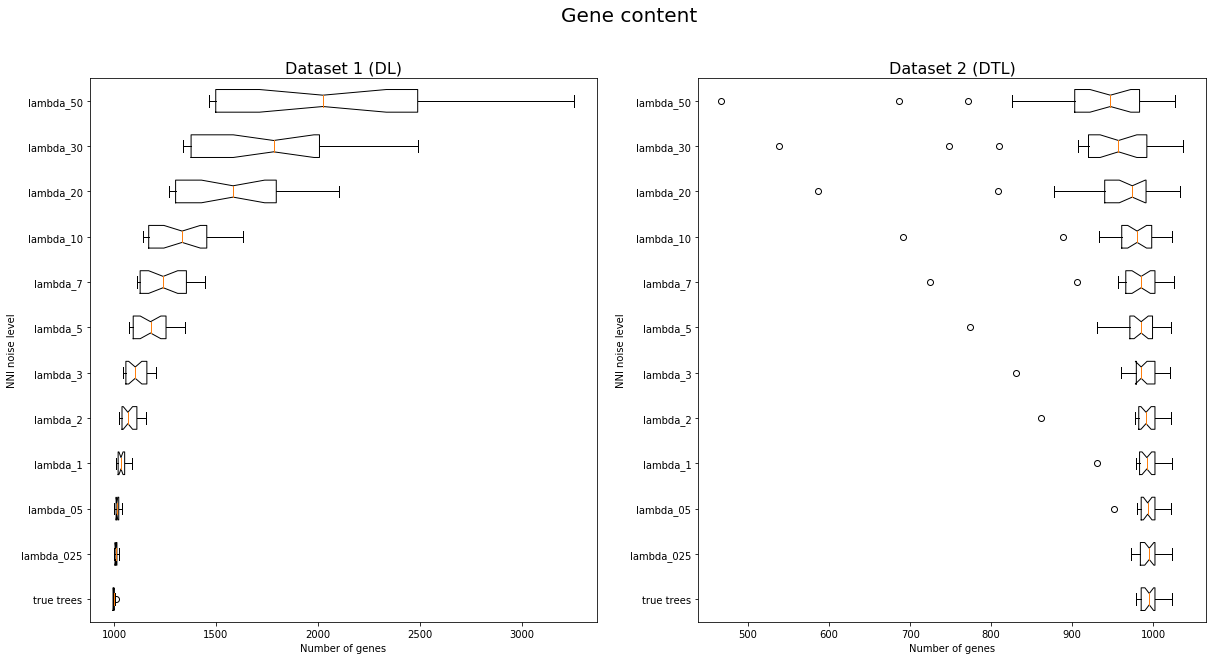

In [8]:
# Boxplots of the gene content

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].boxplot(GENE_CONTENT_DL_2D, vert=False, notch=True)
ax[0].set_title('Dataset 1 (DL)', fontsize=16)
ax[0].set_yticklabels(TLAMBDA)
ax[0].set_xlabel('Number of genes')
ax[0].set_ylabel('NNI noise level')


ax[1].boxplot(GENE_CONTENT_DTL_2D, vert=False, notch=True)
ax[1].set_title('Dataset 2 (DTL)', fontsize=16)
ax[1].set_yticklabels(TLAMBDA)
ax[1].set_xlabel('Number of genes')
ax[1].set_ylabel('NNI noise level')

fig.suptitle('Gene content', fontsize=20)

plt.savefig('2018_07_15_D10T0L20I10T10-2018_07_16_D10T10L20I10T10-gene_content.png')

plt.show()

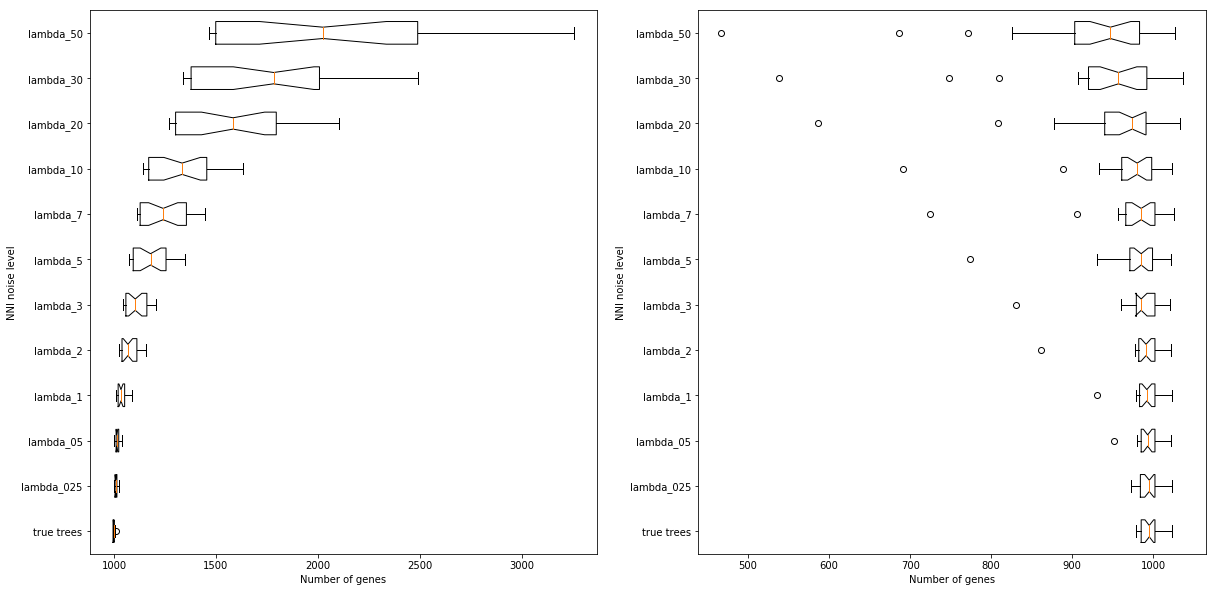

In [9]:
# Boxplots of the gene content, for the paper

fig1, ax1 = plt.subplots(1, 2, figsize=(20, 10))

ax1[0].boxplot(GENE_CONTENT_DL_2D, vert=False, notch=True)
ax1[0].set_yticklabels(TLAMBDA)
ax1[0].set_xlabel('Number of genes')
ax1[0].set_ylabel('NNI noise level')


ax1[1].boxplot(GENE_CONTENT_DTL_2D, vert=False, notch=True)
ax1[1].set_yticklabels(TLAMBDA)
ax1[1].set_xlabel('Number of genes')
ax1[1].set_ylabel('NNI noise level')

plt.savefig('2018_07_15_D10T0L20I10T10-2018_07_16_D10T10L20I10T10-gene_content_paper.png')

plt.show()

### Comments

We can observe the fact that with HGT the gene content does not indicate an anomaly, unlike the reconciliation score. The species with almost no gene (even in the true trees) is species 52.

In [13]:
def measure_linearity(prefix,prefix_true_trees,ancestral_species):
    # Linearity of the perturbed tree
    ngbs = {l: {species: {} for species in ancestral_species} for l in TLAMBDA}
    for L in LAMBDA:
        data = open(prefix+'/'+L+'/'+L+'.genes.txt','r').readlines()
        for gene in data:
            species = gene.split()[0]
            name    = gene.split()[1]
            if species in ancestral_species:
                ngbs[L][species][name] = []
    data = open(prefix_true_trees+'.genes.txt','r').readlines()
    for gene in data:
        species = gene.split()[0]
        name    = gene.split()[1]
        if species in ancestral_species:
            ngbs[TRUE][species][name] = []
    for L in LAMBDA:
        data = open(prefix+'/'+L+'/'+L+'.adjacencies.txt','r').readlines()
        for gene in data:
            species = gene.split()[0]
            name1   = gene.split()[1]
            name2   = gene.split()[2]
            if species in ancestral_species:
                ngbs[L][species][name1].append(name2)
                ngbs[L][species][name2].append(name1)
    data = open(prefix_true_trees+'.adjacencies.txt','r').readlines()
    for gene in data:
        species = gene.split()[0]
        name1   = gene.split()[1]
        name2   = gene.split()[2]
        if species in ancestral_species:
            ngbs[TRUE][species][name1].append(name2)
            ngbs[TRUE][species][name2].append(name1)
    linearity = {l: {species: 0 for species in ancestral_species} for l in TLAMBDA}
    for L in TLAMBDA:
        for species in ngbs[L].keys():
            for gene in ngbs[L][species].keys():
                linearity[L][species] += abs(len(ngbs[L][species][gene])-2)
    return(linearity) 

In [14]:
# Reading the gene content from the DeCoStar gene files

LINEARITY_DL  = measure_linearity('../../exp/2018_07_15_D10T0L20I10T10_NNI_DECOSTAR/results/DeCoSTAR/','../../decostar_instances/results/notransfers_true_trees',ANCSPECIES_DL)
LINEARITY_DTL = measure_linearity('../../exp/2018_07_16_D10T10L20I10T10_NNI_DECOSTAR/results/DeCoSTAR/','../../decostar_instances/results/notransfers_true_trees',ANCSPECIES_DTL)

# Turning it into a 2D list for plotting purposes.
LINEARITY_DL_2D = []
for L in TLAMBDA:
    LINEARITY_DL_2D.append(list(LINEARITY_DL[L].values()))
    
LINEARITY_DTL_2D = []
for L in TLAMBDA:
    LINEARITY_DTL_2D.append(list(LINEARITY_DTL[L].values()))

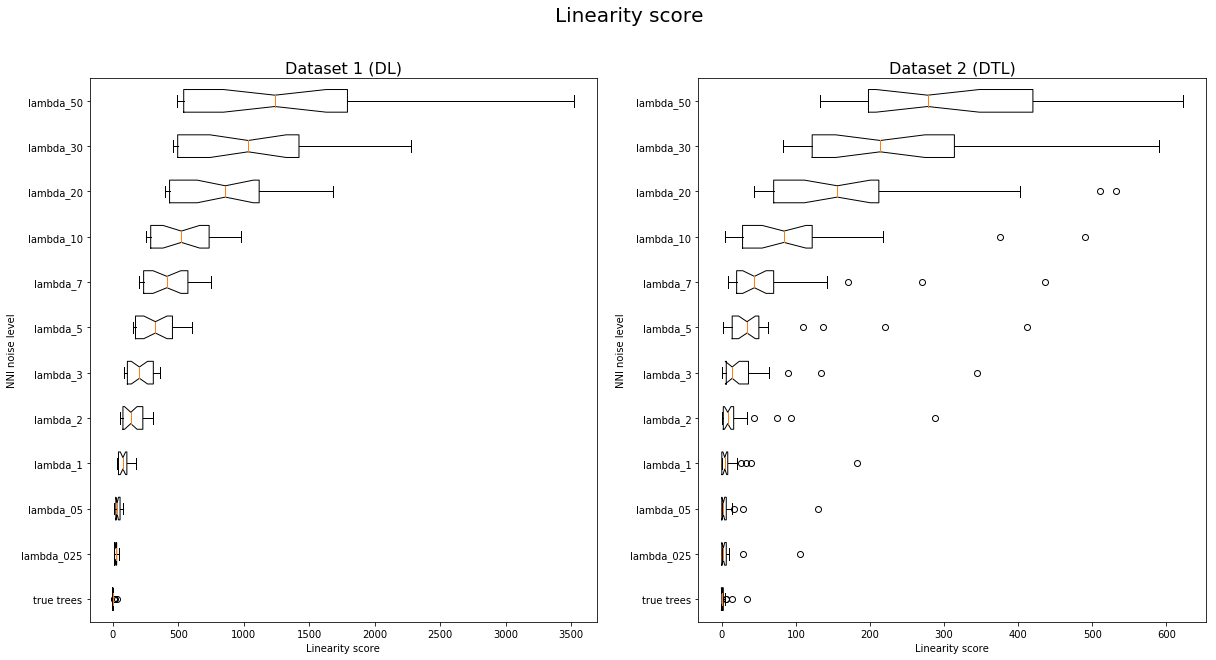

In [20]:
# Boxplots of the linearity score

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].boxplot(LINEARITY_DL_2D, vert=False, notch=True)
ax[0].set_title('Dataset 1 (DL)', fontsize=16)
ax[0].set_yticklabels(TLAMBDA)
ax[0].set_xlabel('Linearity score')
ax[0].set_ylabel('NNI noise level')


ax[1].boxplot(LINEARITY_DTL_2D, vert=False, notch=True)
ax[1].set_title('Dataset 2 (DTL)', fontsize=16)
ax[1].set_yticklabels(TLAMBDA)
ax[1].set_xlabel('Linearity score')
ax[1].set_ylabel('NNI noise level')

fig.suptitle('Linearity score', fontsize=20)

plt.savefig('2018_07_15_D10T0L20I10T10-2018_07_16_D10T10L20I10T10-linearity.png')

plt.show()

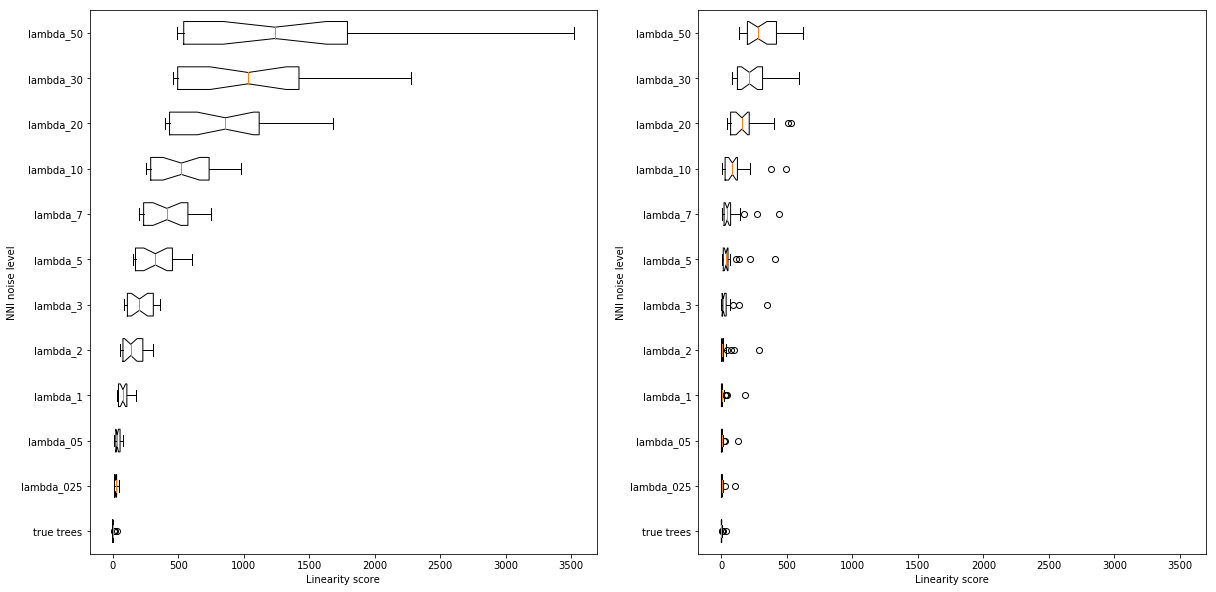

In [19]:
# Boxplots of the linearity score for the paper

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

ax[0].boxplot(LINEARITY_DL_2D, vert=False, notch=True)
ax[0].set_yticklabels(TLAMBDA)
ax[0].set_xlabel('Linearity score')
ax[0].set_ylabel('NNI noise level')


ax[1].boxplot(LINEARITY_DTL_2D, vert=False, notch=True)
ax[1].set_yticklabels(TLAMBDA)
ax[1].set_xlabel('Linearity score')
ax[1].set_ylabel('NNI noise level')


plt.savefig('2018_07_15_D10T0L20I10T10-2018_07_16_D10T10L20I10T10-linearity_paper.png')

plt.show()